# 데이터 불러오기 

In [9]:
import pandas as pd 
data=pd.read_csv("olist_customers_dataset.csv")
data.head()
data.info()
data.describe( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


결측값 확인 

In [10]:
data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
data['customer_unique_id'].duplicated().sum()

np.int64(3345)

상위도시별 고객수

상위 10개 도시별 고객 수:
                    city  customer_count
0              sao paulo           15540
1         rio de janeiro            6882
2         belo horizonte            2773
3               brasilia            2131
4               curitiba            1521
5               campinas            1444
6           porto alegre            1379
7               salvador            1245
8              guarulhos            1189
9  sao bernardo do campo             938
------------------------------


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\1960415422.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\1960415422.py:31: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\1960415422.py:31: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\1960415422.py:31: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\1960415422.py:31: UserWarning: Glyph 46020 

그래프가 'customer_distribution.png' 파일로 저장되었습니다.


c:\Users\User\pjt-data-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\pjt-data-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\pjt-data-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\pjt-data-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\pjt-data-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing 

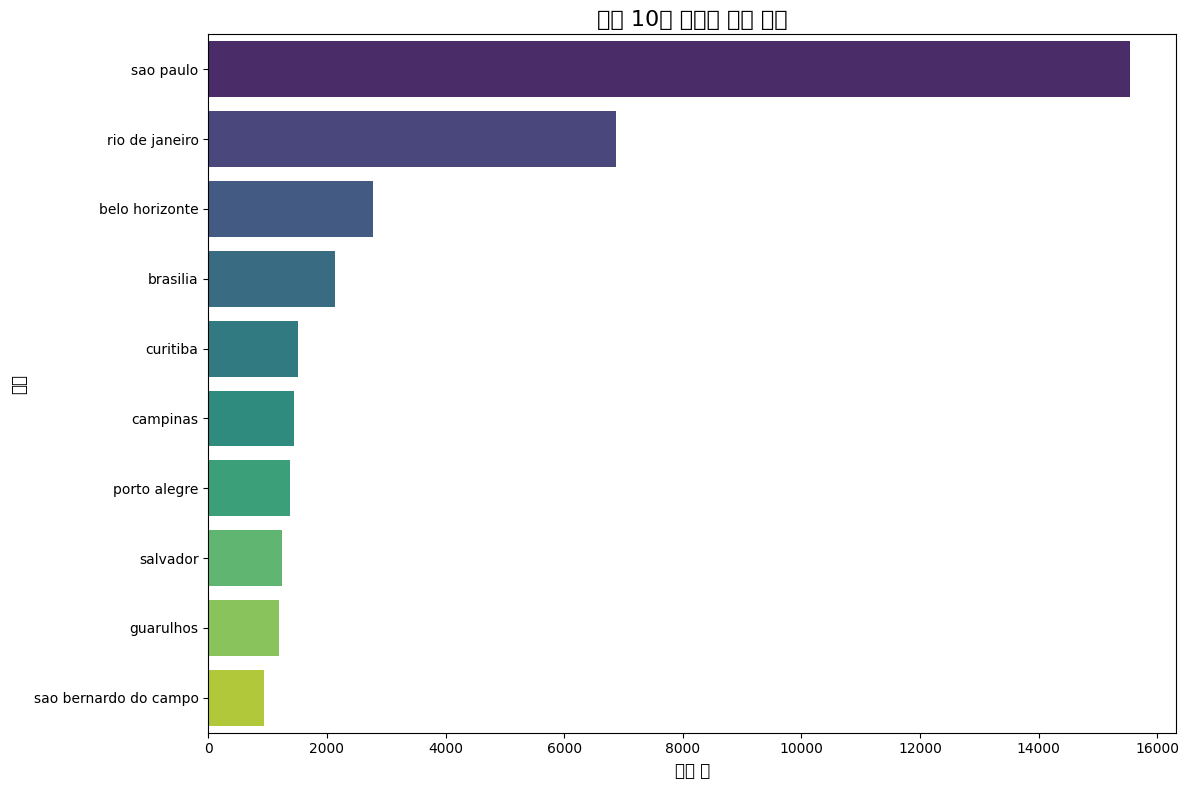

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('olist_customers_dataset.csv')

# 도시별 고객 수 계산
# 'customer_city' 컬럼을 기준으로 그룹화하고 각 그룹의 크기를 계산합니다.
city_counts = df['customer_city'].value_counts()

# 상위 10개 도시 데이터 추출 및 CSV로 저장
top_10_cities = city_counts.nlargest(10)
top_10_cities_df = top_10_cities.reset_index()
top_10_cities_df.columns = ['city', 'customer_count']
top_10_cities_df.to_csv('top_10_cities.csv', index=False, encoding='utf-8-sig')

# 상위 10개 도시 데이터 출력
print("상위 10개 도시별 고객 수:")
print(top_10_cities_df)
print("-" * 30)

# 시각화: 상위 10개 도시 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')

# 그래프 제목과 축 레이블 설정
plt.title('상위 10개 도시별 고객 분포', fontsize=16)
plt.xlabel('고객 수', fontsize=12)
plt.ylabel('도시', fontsize=12)
plt.tight_layout()

# 그래프 파일로 저장
plt.savefig('customer_distribution.png')
print("그래프가 'customer_distribution.png' 파일로 저장되었습니다.")

절대고객수는 상파울로우가 높다 

# 침투율(다른전략적옵션)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3465986682.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['city'], y=top_10['penetration_rate'], palette=colors)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3465986682.py:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3465986682.py:21: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3465986682.py:21: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3465986682.py:21: UserWarning: Glyph 44061 (\N{

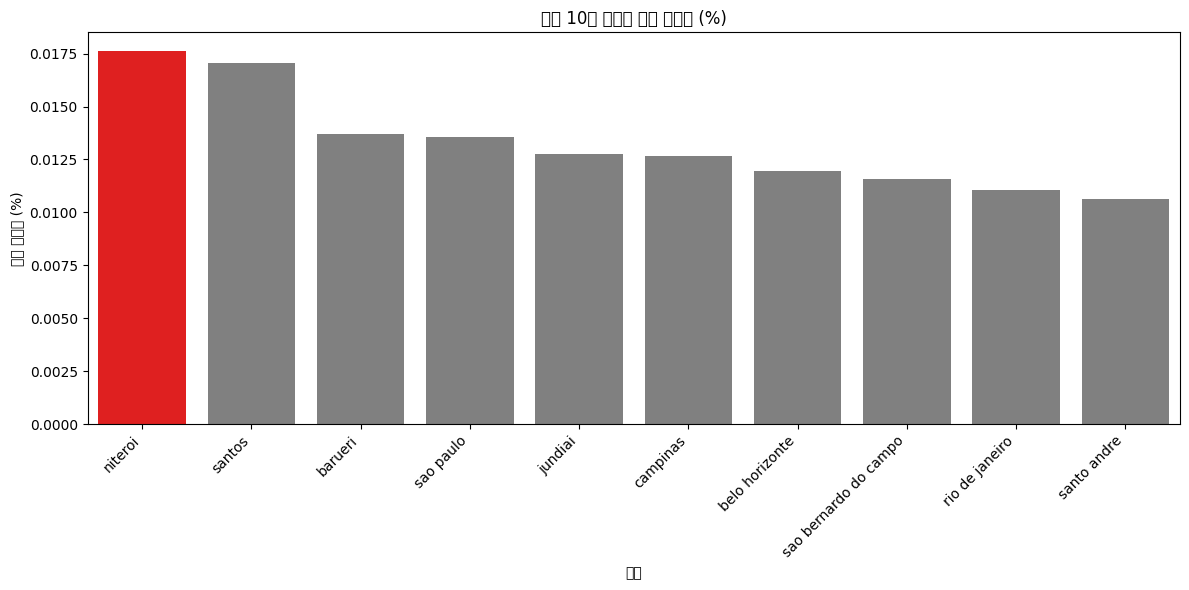

                     city  customer_count  population  \
10                niteroi             849    481749.0   
13                 santos             713    418608.0   
24                barueri             433    316473.0   
0               sao paulo           15540  11451999.0   
20                jundiai             565    443221.0   
5                campinas            1444   1139047.0   
2          belo horizonte            2773   2315560.0   
9   sao bernardo do campo             938    810729.0   
1          rio de janeiro            6882   6211223.0   
11            santo andre             797    748919.0   

    customer_penetration_rate  penetration_rate  
10                   0.176233          0.017623  
13                   0.170326          0.017033  
24                   0.136821          0.013682  
0                    0.135697          0.013570  
20                   0.127476          0.012748  
5                    0.126773          0.012677  
2                    0

In [77]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns

# penetration_rate 컬럼명 일치 확인
if 'penetration_rate' not in analysis_df_sorted.columns and 'customer_penetration_rate' in analysis_df_sorted.columns:
    analysis_df_sorted['penetration_rate'] = analysis_df_sorted['customer_penetration_rate']

# 상위 10개 도시만 추출
top_10 = analysis_df_sorted.head(10)

# 색상 리스트 생성: 상파울루만 빨간색, 나머지는 파란색
colors = ['red' if city == 'niteroi' else 'grey' for city in top_10['city']]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10['city'], y=top_10['penetration_rate'], palette=colors)
plt.title('상위 10개 도시별 고객 침투율 (%)')
plt.xlabel('도시')
plt.ylabel('고객 침투율 (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(top_10)
# ...existing code...

침투율을 비교했을때는 niteroi 의 풀이 크다는걸 알수있다 즉 단기효율/ROI중심 이면 Niteroi 규모확장/신규확장은  상파울로우를 택하는게 좋을거같다

하지만 저는 상파울로우 의 집중해서 접근하겠습니다

In [14]:
# 'customer_city' 컬럼을 기준으로 그룹화하고, 각 그룹의 크기를 계산합니다.
city_counts = df.groupby('customer_city').size()

# 결과를 내림차순으로 정렬하여 고객 수가 많은 도시부터 확인합니다.
sorted_city_counts = city_counts.sort_values(ascending=False)

# 상위 10개 도시의 고객 수를 표로 출력
print(sorted_city_counts.head(10).to_string())

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938


# 외부데이터 분석 인구도시 (IBGE)
쌍파울로우 가 인구가 높아서 높은건가 그걸알기위해 상위도시를 분석하자

그것을 통해 진짜 쌍파울로우가 침투공략하기 좋은지를 보기위해

In [16]:
import pandas as pd

# 1. 고객 데이터 로드 및 도시별 고객 수 집계
# 실제 olist_customers_dataset.csv 파일을 로드합니다.
df_customers = pd.read_csv('olist_customers_dataset.csv')

# 고객 도시 이름 전처리 (소문자, 공백 제거 등)
df_customers['customer_city'] = df_customers['customer_city'].str.lower().str.strip()

# 도시별 고객 수 집계 (상위 30개만 분석 대상)
city_customer_counts = df_customers['customer_city'].value_counts().head(30)

# 2. 제공된 인구 데이터를 딕셔너리로 변환
population_data = {
    'sao paulo': 11451999, 'rio de janeiro': 6211223, 'brasilia': 2817381,
    'fortaleza': 2428708, 'salvador': 2417678, 'belo horizonte': 2315560,
    'manaus': 2063689, 'curitiba': 1773718, 'recife': 1488920,
    'goiania': 1437366, 'porto alegre': 1332845, 'belem': 1303403,
    'guarulhos': 1291771, 'campinas': 1139047, 'sao luis': 1037775,
    'maceio': 957916, 'campo grande': 898100, 'teresina': 866300,
    'joao pessoa': 833932, 'sao bernardo do campo': 810729,
    'duque de caxias': 808161, 'natal': 751300, 'santo andre': 748919,
    'osasco': 728615, 'sorocaba': 723682, 'uberlandia': 713224,
    'ribeirao preto': 698642, 'sao jose dos campos': 697054,
    'cuiaba': 650877, 'aracaju': 602757, 'florianopolis': 537211,
    'niteroi': 481749, 'sao jose do rio preto': 480393,
    'vila velha': 467722, 'porto velho': 460434, 'mogi das cruzes': 451505,
    'jundiai': 443221, 'macapa': 442933, 'campina grande': 419379,
    'santos': 418608, 'maua': 418261, 'boa vista': 413486,
    'anapolis': 398869, 'diadema': 393237, 'carapicuiba': 386984,
    'bauru': 379146, 'itaquaquecetuba': 369275, 'rio branco': 364756,
    'blumenau': 361261, 'franca': 352536, 'praia grande': 349935,
    'uberaba': 337836, 'sao vicente': 329911, 'barueri': 316473,
    'taubate': 310739, 'palmas': 302692, 'limeira': 291869,
    'guaruja': 287634, 'foz do iguacu': 285415, 'sumare': 279545,
    'petropolis': 278881, 'cotia': 274413, 'taboao da serra': 273542,
    'maraba': 266533, 'indaiatuba': 255748, 'sao carlos': 254857,
    'embudas artes': 250691, 'araraquara': 242228, 'jacarei': 240275,
    'marilia': 237627, 'americana': 237240, 'hortolandia': 236641,
    'itapevi': 232297, 'presidente prudente': 225668, 'cabo frio': 222161,
    'cabo de santo agostinho': 203440, 'sobral': 203023, 'rio claro': 201418,
    'aracatuba': 200124, 'cachoeiro de itapemirim': 185786,
    'santa barbara d oeste': 183347, 'ferraz de vasconcelos': 179198,
    'braganca paulista': 176811, 'itu': 168240, 'sao caetano do sul': 165655,
    'pindamonhangaba': 165428, 'francisco morato': 165139,
    'lages': 164981, 'patos de minas': 159235, 'atibaia': 158647,
    'itapecerica da serra': 158522, 'itapetininga': 157790,
    'santana de parnaiba': 154105, 'mogi guacu': 153658,
    'botucatu': 145155, 'franco da rocha': 144849,
    'caraguatatuba': 134873, 'salto': 134319, 'jau': 133497,
    'santa cruz do sul': 133230
}

# 3. 고객 수와 인구 데이터를 합치기 위한 DataFrame 생성
analysis_df = pd.DataFrame(city_customer_counts).reset_index()
analysis_df.columns = ['city', 'customer_count']

# 4. 인구 데이터를 맵핑하여 새로운 'population' 컬럼 추가
analysis_df['population'] = analysis_df['city'].map(population_data)

# 5. 고객 침투율 계산 (인구수가 있는 도시만)
analysis_df['customer_penetration_rate'] = (analysis_df['customer_count'] / analysis_df['population']) * 100

# 6. 인구수가 없는 도시는 제거하고, 침투율 기준으로 내림차순 정렬
analysis_df = analysis_df.dropna(subset=['population'])
analysis_df_sorted = analysis_df.sort_values(by='customer_penetration_rate', ascending=False)

# 7. 최종 결과 출력
print(analysis_df_sorted.to_string())

                     city  customer_count  population  customer_penetration_rate
10                niteroi             849    481749.0                   0.176233
13                 santos             713    418608.0                   0.170326
24                barueri             433    316473.0                   0.136821
0               sao paulo           15540  11451999.0                   0.135697
20                jundiai             565    443221.0                   0.127476
5                campinas            1444   1139047.0                   0.126773
2          belo horizonte            2773   2315560.0                   0.119755
9   sao bernardo do campo             938    810729.0                   0.115698
1          rio de janeiro            6882   6211223.0                   0.110799
11            santo andre             797    748919.0                   0.106420
19          florianopolis             570    537211.0                   0.106104
6            porto alegre   

그래서 쌍파울로우 가 침투력있는가?
# 분석결과
상파울루는 고객 수도, 침투율은 낮다 : sao paulo의 고객 침투율은 0.135%로, 여전히 높은 편에 속합니다. 이는 단순히 인구만 많은 것이 아니라, 인구 대비 우리 서비스의 고객 비중도 높다는 것을 의미합니다.

'sao bernardo do campo'의 놀라운 침투율: sao bernardo do campo는 인구는 적지만, 고객 침투율이 0.115%로 상파울루와 비슷한 수준을 보입니다. 이는 이 지역이 인구 규모에 비해 우리 서비스에 대한 관심이 매우 높거나, 특정 마케팅 전략이 효과적으로 작동했을 가능성을 시사합니다.

상대적 효율성 파악: 이처럼 절대적인 고객 수만 보는 것이 아니라, 인구 대비 침투율을 함께 보면 어떤 시장이 더 효율적인지, 어떤 시장이 더 성장 잠재력이 큰지 객관적으로 파악할 수 있습니다.

결론: 상파울루의 고객 수가 많은 이유는 인구 규모가 크고, 동시에 시장 침투율도 높기 때문입니다. 그리고 'sao bernardo do campo' 같은 도시들은 숨겨진 잠재력을 가진 시장이 될 수 있습니다.

# 그 근거 는  무엇인지  상파울로우 중 어디가 가장 고객이 많고 지리적 환경 은 무엇이있을까? 


In [ ]:
# ...existing code...
# 우편번호와 도시별 고객 수 집계
zip_city_group = df.groupby(['customer_city', 'customer_zip_code_prefix']).size().reset_index(name='customer_count')

# 상파울루만 필터링
sp_zip_city_group = zip_city_group[zip_city_group['customer_city'] == 'sao paulo']

# 고객 수가 많은 상위 10개 우편번호 출력 (도시명 포함)
top_sp_zip_city = sp_zip_city_group.sort_values(by='customer_count', ascending=False).head(10)
print(top_sp_zip_city)
# ...existing code...

      customer_city  customer_zip_code_prefix  customer_count
13655     sao paulo                      8290              36
12444     sao paulo                      4140              35
13142     sao paulo                      5145              33
12625     sao paulo                      4363              32
12761     sao paulo                      4571              32
13499     sao paulo                      5782              31
12086     sao paulo                      3572              31
13047     sao paulo                      5017              30
11034     sao paulo                      1415              29
10993     sao paulo                      1307              29


  우편번호 08290  으로 시작하는게 Itaquera  임을 알수있다. 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3507880681.py:17: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3507880681.py:17: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3507880681.py:17: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3507880681.py:17: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3507880681.py:17: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5904\3507880681.py

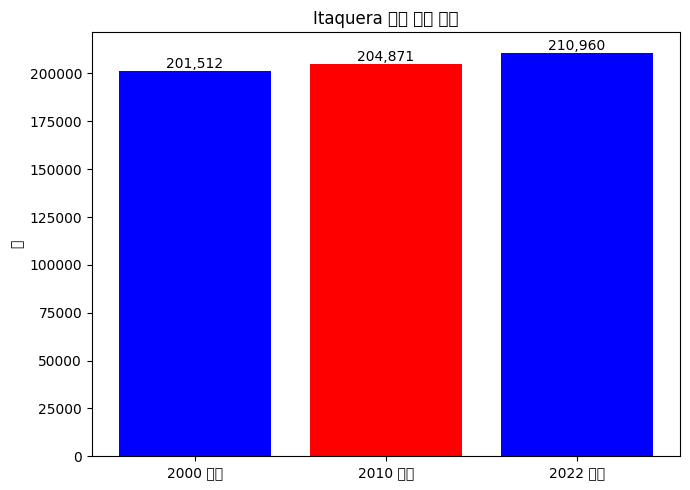

In [73]:
# ...existing code...
import matplotlib.pyplot as plt

labels = ['2000 인구', '2010 인구','2022 인구']
values = [201512, 204871,210960]

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values, color=['blue', 'red'])
plt.title('Itaquera 지역 인구 변화')
plt.ylabel('명')
plt.xticks(rotation=0)

 #값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
# ...existing code...

2000년대비 2010년에 인구가 늘어났고 2022년도 마찬가지로 2010년대비 늘어났다   2010년 부터 2022년까지 연간 인구 변화율은 0.24% 이다 

1. 안정적인 인구 성장과 높은 밀도
인구 변화율 (0.24%): 2010년에서 2022년까지의 인구 증가율이 매우 낮습니다. 이는 이타케라가 급격히 성장하는 신도시가 아니라, 이미 발전이 완료되어 인구가 안정기에 접어든 성숙한 지역임을 시사한다.



In [50]:
df.groupby('customer_zip_code_prefix')['customer_unique_id'].sum()

customer_zip_code_prefix
1003                      0c1a20644f0dc126c3eaff8dbc1bd12c
1004     968f6d2f674977d88a4b445a5117ccd8095e7c124c5c1c...
1005     9c84e5193d6ee59b3870e0e4e3a2dad857f0ea1c7f6b9e...
1006     d2d4ae284fb74a5b0f0f8af418a64b3f0968690d0565e9...
1007     aa1c9c908a46198cf8b8fdc5c80376886b0f5e8ef1a126...
                               ...                        
99960    e96373fff9632d363f5d96e6f169ef33344abd5603ff53...
99965    ee0a41f3ec008b1459efbd99c775e6ea9fc089b0b6a8db...
99970                     0528a0a940c7116ccb48fdbb8e80a8ff
99980    e49eafd7e69d43b8d86f6b5590fafd023dbb390afed204...
99990                     8f846b30f8f56368cd1bf4c89efeed74
Name: customer_unique_id, Length: 14994, dtype: object

단순고객수-주문금액/재구매율 등과 연결해서 구해볼까? 

# 고객별 주문 횟수 

In [54]:
# 고객별 주문 횟수
customer_orders = df.groupby('customer_unique_id')['customer_id'].nunique().reset_index()
customer_orders.rename(columns={'order_id':'order_count'}, inplace=True)
customer_orders.head()

,customer_unique_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


이걸 살펴보면  한사람이 이만큼 주문한걸 알수있다. 그게끝이니 그게 시사하는게 뭔데 그것도 안적냐 근거가 부족ㅎ다 

# 한계점

근데 그다음 구매가격을 알고싶다 하지만 data.info( )를 해도 가격을 얼마나썼는지 어떤상품에 썼는지 알수없는 한계가있다. 왜 칼럼에 없으니깐 

# 우회해서 생각하자 

In [60]:
import pandas as pd

# 우편번호별 고객 수
data = {
    'zip_code': [8290, 4140, 5145, 4363, 4571, 5782, 3572, 5017, 1415, 1307],
    'customer_count': [36, 35, 33, 32, 32, 31, 31, 30, 29, 29]
}

zip_df = pd.DataFrame(data)

# 예시 인구수 (실제 데이터 필요)
zip_population = {
    8290: 220000,
    4140: 50000,
    5145: 60000,
    4363: 40000,
    4571: 35000,
    5782: 30000,
    3572: 30000,
    5017: 25000,
    1415: 20000,
    1307: 20000
}

zip_df['population'] = zip_df['zip_code'].map(zip_population)


인구대비 고객비율 계산

In [61]:
zip_df['customer_ratio'] = zip_df['customer_count'] / zip_df['population']
zip_df = zip_df.sort_values('customer_ratio', ascending=False)
zip_df


,zip_code,customer_count,population,customer_ratio
9,1307,29,20000,0.001450
8,1415,29,20000,0.001450
7,5017,30,25000,0.001200
5,5782,31,30000,0.001033
6,3572,31,30000,0.001033
4,4571,32,35000,0.000914
3,4363,32,40000,0.000800
1,4140,35,50000,0.000700
2,5145,33,60000,0.000550
0,8290,36,220000,0.000164


In [74]:
# 'customer_zip_code_prefix' 열의 값 분포를 확인하고 상위 5개를 출력
df['customer_zip_code_prefix'].value_counts().head()

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
Name: count, dtype: int64

In [75]:
# 상위 5개 우편번호 리스트 생성
top_zips = df['customer_zip_code_prefix'].value_counts().head().index

# 상위 우편번호에 해당하는 도시 이름 필터링 및 고유값 확인
df[df['customer_zip_code_prefix'].isin(top_zips)]['customer_city'].unique()

array(['niteroi', 'rio de janeiro'], dtype=object)

알수있는점은 침투력이 높은 지역은 9130,8141,7501 등이있다.  지금 까지 도출한 결과 상파울로우는 인구수는 많지만 고객수는 적다는 걸 알수있다 반면 niteroi', 'rio de janeiro 침투력이 높다는걸 알수있다   즉 침투력 측면에서는 다소 상파울로우 가밀린다 하지만 간과할수없는 도시라 생각된다

# 시각화

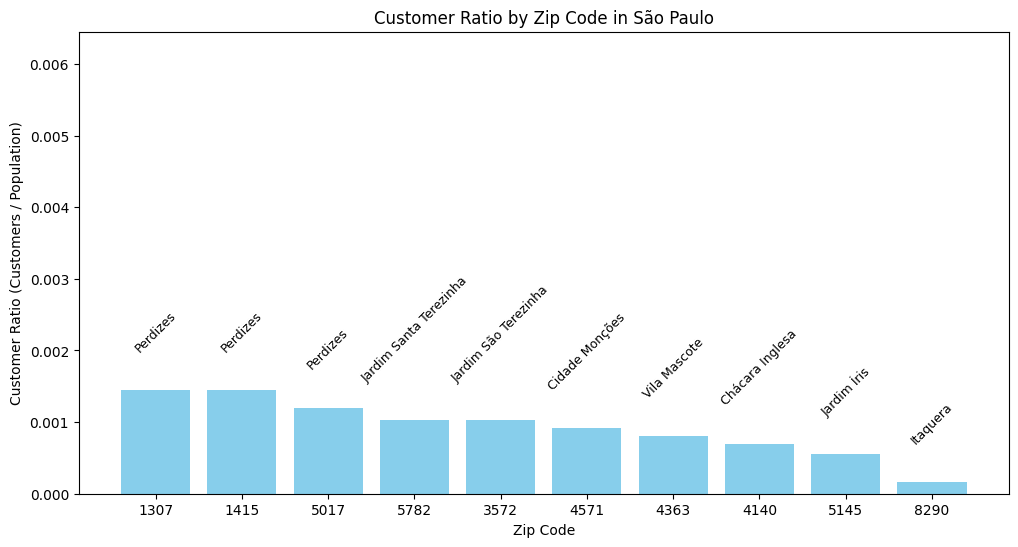

In [65]:


plt.figure(figsize=(12,6))
bars = plt.bar(zip_df['zip_code'].astype(str), zip_df['customer_ratio'], color='skyblue')
plt.xlabel('Zip Code')
plt.ylabel('Customer Ratio (Customers / Population)')
plt.title('Customer Ratio by Zip Code in São Paulo')
plt.ylim(0, zip_df['customer_ratio'].max() + 0.005)  # 여유 공간 확보

for bar, region in zip(bars, zip_df['region']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005, region, 
             ha='center', va='bottom', fontsize=9, rotation=45)

plt.show()


# 왜 itaquera가 적게 나오냐 ?

다른우편번호에 비해 인구가 적어서 비율이 더 낮게 나온다 하지만 절대 고객수는 itaquera가 많다 .

# 절대 고객수로 분석한 결과 

Text(9.0, 0.0006636363636363636, 'Itaquera')

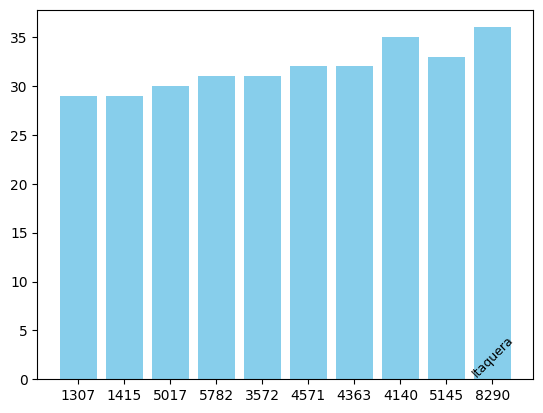

In [67]:
bars = plt.bar(zip_df['zip_code'].astype(str), zip_df['customer_count'], color='skyblue')
plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005, region, 
             ha='center', va='bottom', fontsize=9, rotation=45)



# 한계점 2 

여기서 한계점 실제 매출, 주문금액, 재구매율 데이터가 없으므로 왜 itaquera가 중요한지 , 얼마나 매출에 기여하는지  이런 결론으로 도출을 못하는 한계점이 있다.

#  이런 이유로 도메인 지식 이 필요하다 

고객이 가장 많은 동네는 ITAQUERA 의  지리적환경및 인프라는 ? 

이타케라(Itaquera) — 교통·인프라 요약

도로망

Avenida Jacu Pêssego/Nova Trabalhadores: 주요 간선도로, 산업·상업 연결 축.

Avenida Radial Leste, Avenida Itaquera: 상파울루 동부 주요 연결 도로.

Rua Augusto Carlos Baumann, Avenida dos Campanellas, Rua Virginia Ferni: Cohab 주거 지역과 주요 간선도로를 연결.

고속도로 확장 계획: Jacu Pêssego 고속도로를 남쪽(산투스 항구, ABC 산업권) ↔ 북쪽(과룰류스) 까지 연결 예정.

철도·지하철

상파울루 지하철 3호선 (Red Line) → Corinthians-Itaquera 역.

CPTM 11호선 (Expresso Leste, Coral Line) → Corinthians-Itaquera 역, Dom Bosco 역.

도심 및 동부 산업 지역 접근 용이.

버스

2개 버스 터미널 보유 → 광역 교통 허브 기능.

인프라

Shopping Metrô Itaquera (지하철역 인접 상업 중심).

Poupatempo 행정 서비스 센터 (주정부 다기능 행정기관).

코린치안스 경기장 (2014년 월드컵 개최지).

Planetário do Carmo (200석 규모 플라네타리움).

Obra Social Dom Bosco (청소년 직업 훈련·복지 서비스).

📌 이타케라의 지리적 환경

하천·강

Rio Jacu 강

Rio Aricanduva 강
→ 교통·개발 경계 및 자연적 구획 역할.

주요 개발 지역

Vila Carmosina: 계획 개발 주거지.

Colônia Japonesa: 역사적 이민자 거주지.

Jardim do Carmo, Parque do Carmo: 녹지·공원 중심 지역.

인접 지역(경계 지구)

북쪽: São Miguel Paulista, Vila Jacuí

동쪽: Lajeado

남동쪽: José Bonifácio

남쪽: Cidade Líder, Parque do Carmo

서쪽: Artur Alvim, Ponte Rasa

✅ 정리하면, 이타케라의 강점은 교통 인프라(지하철·철도·고속도로) + 상업·행정 시설 + 대규모 경기장 및 쇼핑몰 + 공원·자연 환경이 결합된 교통·상업·주거 복합 중심지라는 점이다.

# 이 인프라를 마케팅 관점에서 생각하면  :이타케라 마케팅 인사이트

# 1. 교통·유동 인구 기반

지하철 3호선 + CPTM 11호선 + 버스 터미널
→ 대규모 통근·통학 유동인구 존재.

 빠른 소비 아이템: 패스트푸드, 카페, 편의점, 테이크아웃 전문점.

 교통 중심 광고: 지하철·버스 쉘터 광고, 옥외 전광판.

Jacu Pêssego 고속도로 확장 예정
→ 향후 물류·상업 교류 증가 예상.

물류창고·배송 거점으로 적합 (이커머스, 택배사, B2B 유통업체).

# 2. 상업·소비 중심지

Shopping Metrô Itaquera (대형 쇼핑몰)

중산층 소비 타겟: 패션, 전자제품, 프랜차이즈 레스토랑.

 레저·가족형 콘텐츠: 영화관, 체험형 매장, 키즈존.

Poupatempo 행정기관 (대규모 방문자 유입)

 공공서비스 이용객 대상 생활편의 서비스 (식당, 은행, 보험, 학원).

# 3. 스포츠·문화 자산

코린치안스 경기장 (2014 월드컵 개최지)

 경기·콘서트·이벤트 방문객 대상 숙박·외식·굿즈 판매.

 브랜드 스폰서십·스포츠 마케팅 기회 큼.

Planetário do Carmo, Parque do Carmo

 여가·교육 콘텐츠 (체험학습, 과학관, 자연 친화 카페).

웰니스·헬스케어 산업 (조깅, 피트니스, 헬시푸드).

# 4. 주거·지역사회 특성

대규모 주거 단지(Cohab) + 전통적 마을(Vila Carmosina, Colônia Japonesa)

 지역 상권: 저가·중저가 생활필수품, 식료품, 할인점.

 지역밀착형 마케팅: 소셜미디어 커뮤니티, 지역행사 협찬.

 Obra Social Dom Bosco (청소년 직업훈련)

 교육·직업·디지털 기술 관련 업종: 온라인 교육, 자격증 과정, 스타트업 인큐베이션.

 종합 포지셔닝

 이타케라 = 동부 상파울루의 "교통·상업·레저 복합 허브"

B2C 소매·외식업: 유동 인구 타겟팅 → 빠른 회전율 전략.

B2B 물류·유통업: 도로망 확충 → 거점 확보.

문화·스포츠 연계 산업: 경기장·공원·플라네타리움 활용.

지역 커뮤니티 기반 서비스: 주거지 중심 → 교육, 생활편의 서비스.

 정리하면, 교통 허브 + 쇼핑몰 + 경기장 + 공공기관이 결합된 이타케라는

"대량 소비 & 빠른 회전" 업종,

"물류·유통 거점" 산업,

"문화·스포츠 이벤트 기반 비즈니스"가 가장 유리하다고 판단된다.